<a href="https://colab.research.google.com/github/jatinsharma16/Capstone-Project-EDA/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive 

In [2]:
# mounting 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Defining the path of the file and reading the csv file from the drive
path = '/content/drive/MyDrive/Almabetter/Modules/Python/Capstone project/Hotel Bookings.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


<h3> So the above data shows that we have records from 1-July-2015 to 31-August-2017

In [6]:
df.shape

(119390, 32)

<h3> So, the dataframe contains 119390 rows and 32 columns which have data of several hotel bookings.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
df.describe().shape

(8, 20)

The shape of describe function tells that there are 20 numerical columns and the rest are object or string type columns.

In [10]:
# We have 32 columns and we can check the name of these columns as follows
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

**COLUMNS DESCRIPTION**

- **hotel**: type of hotel.
- **is_canceled**: whether the booking is canceled or not.
- **lead_time**: the time period between booking and arrival.
- **arrival_date_year**: the year of customer arrival.
- **arrival_date_month**: the month of customer arrival.
- **arrival_date_week_number**: the week of customer arrival.
- **arrival_date_day_of_month**: the day of the month of customer arrival.
- **stays_in_weekend_nights**: count of weekend night stays.
- **stays_in_week_nights**: count of week-night stays
- **adults**: number of adults in the customers that arrived.
- **children**: number of childrens in the customers.
- **babies**: number of babies in the customers.
- **meal**: the meal preferred by the customers.
- **country**: the country of the customer.
- **market_segment**: the market segment to which the customer belongs defines the purpose of the customer's visit.
- **distribution_channel**: it defines the medium through which the customer booked a room.
- **is_repeated_guest**: defines whether the customer is a repeated guest or not.
- **previous_cancellations**: provides the previous cancellation record of the customer.
- **previous_bookings_not_canceled**: defines whether the customer has never canceled a booking.
- **reserved_room_type**: type of room reserved by the customer.
- **assigned_room_type**: type of room assigned to the customer.
- **booking_changes**: the amount of changes made by the customer.
- **deposit_type**: defines the medium through which the customer did the payments.
- **agent**: which agent was used for the bookings.
- **company**: which company was used for the bookings.
- **days_in_waiting_list**: defines the number of waiting days for the customer.
- **customer_type**: defines the type of the customer.
- **adr**: provides an average daily rate, which is the measure of average revenue per day. 
- **required_car_parking_spaces**: number of parking spaces required by the customer.
- **total_of_special_requests**: total number of special requests made by the customer.
- **reservation_status**: defines whether the customer is still in the hotel or did check out. 
- **reservation_status_date**: the date of updation of reservation status.

In [11]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

So we can clearly see that there are 4 columns which contains null values, namely ['children', 'country', 'agent', 'company']. We can fill the null values of children-column with 0, and the null values of country-column with 'other'.

In [12]:
df['children'].fillna(0, inplace = True)
df['country'].fillna('other', inplace = True)

In [13]:
# Now we have to check the percentage of null values in the agent and company column.
percent_null_agent = (df['agent'].isna().sum() / len(df['agent'])) * 100
percent_null_company = (df['company'].isna().sum() / len(df['company'])) * 100
print(f'Null agent value percentage: {percent_null_agent:.2f}')
print(f'Null company value percentage: {percent_null_company:.2f}')

Null agent value percentage: 13.69
Null company value percentage: 94.31


Since the null values in the agent column are 13.69 percent which can be tolerated therefore we will replace those null values with the 0 whereas in the case of company column, the null values are almost 95 percent, therefore we will drop the company column as it would not be any help to us.

In [14]:
df['agent'].fillna(0, inplace = True)
df.drop(['company'],axis = 1,  inplace = True)

In [15]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

So, we have removed all the null values and now we'll check for the duplicate or redundant data.

In [16]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,1,No Deposit,250.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,0,No Deposit,250.0,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,0,No Deposit,240.0,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,0,No Deposit,240.0,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,0,No Deposit,9.0,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [17]:
# We have 32,001 duplicate rows. Removing the duplicate entries since it affects the results. We will remove the duplicates and just keep the first copy of the data.
df.drop_duplicates(keep = 'first', inplace = True, ignore_index = True)

In [18]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


<h2> So now, we have thoroughly seen the data using the head, tail, describe and info functions. Also we have checked the shape of the data as well as the columns present in the data. We have removed all the null values (either replaced them or dropped them from the data) and we have also removed the duplicate values that were present keeping a single copy of the duplicates.

<h1> So now we will start plotting some graphs so as we can see some insights from the data.

In [19]:
# Importing the two libraries that will help us plot the graphs.
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
plt.rc('font', size = 12)
# this will change the font size of all the labels.

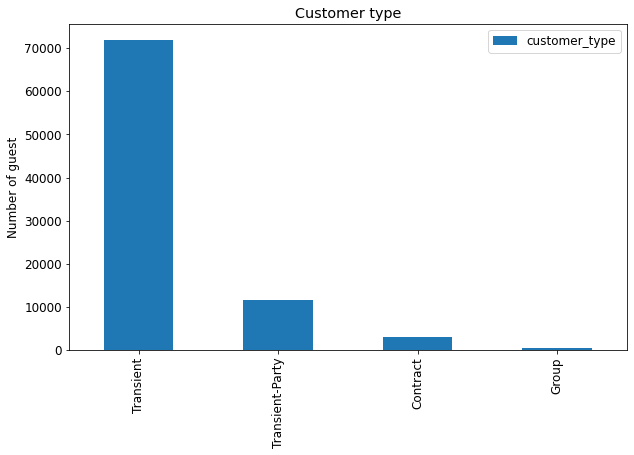

In [176]:
# The below graph would present the number of customers from each type.
plt.figure(figsize=(10,6))
plt.title('Customer type')
df['customer_type'].value_counts().plot(kind = 'bar')
plt.ylabel('Number of guest')
plt.legend()
plt.show()

The above graph shows that the maximum number of bookings are done by the Transient type followed by the Transient-party.

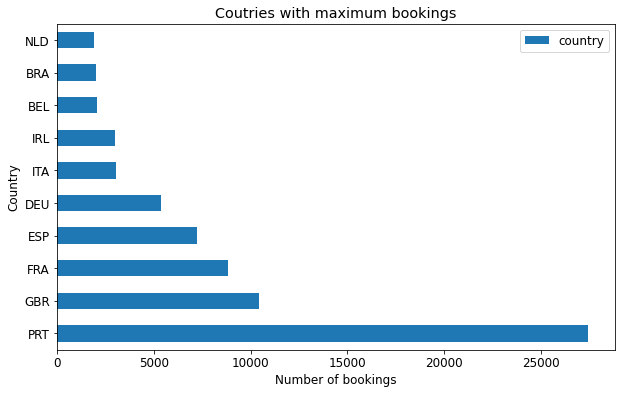

In [22]:
plt.figure(figsize=(10,6))
df['country'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Coutries with maximum bookings')
plt.xlabel('Number of bookings')
plt.ylabel('Country')
plt.legend()
plt.show()

The above graph displays that a huge amount of customers are from the country Portugal(PRT) followed by Great Britain(GBR), France(FRA), Spain(ESP) and Germany(DEU).

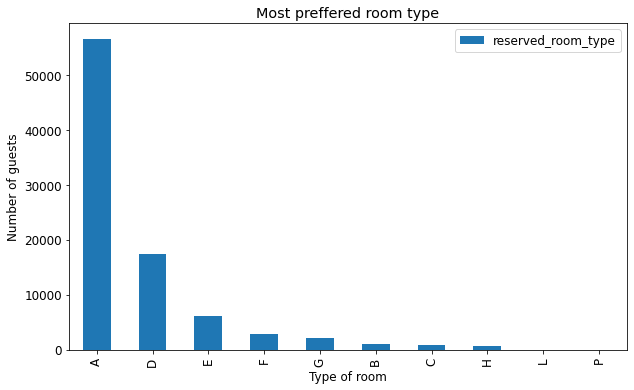

In [23]:
plt.figure(figsize=(10,6))
df['reserved_room_type'].value_counts().plot(kind = 'bar')
plt.title('Most preffered room type')
plt.xlabel('Type of room')
plt.ylabel('Number of guests')
plt.legend()
plt.show()

This shows that the most preferred room type by the customers are 'A' followed by 'D'.

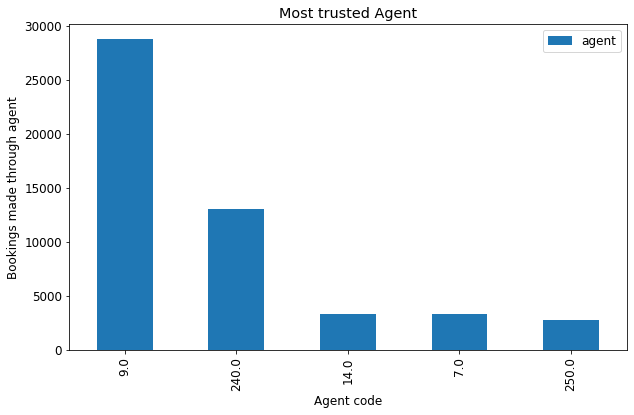

In [24]:
plt.figure(figsize=(10,6))
plt.title('Most trusted Agent')
df_agent = df[df['agent'] != 0]
df_agent['agent'].value_counts().sort_values(ascending=False).head(5).plot(kind='bar')
plt.xlabel('Agent code')
plt.ylabel('Bookings made through agent')
plt.legend()
plt.show()

The most trusted agent by the customers is agent with code '9.0'.

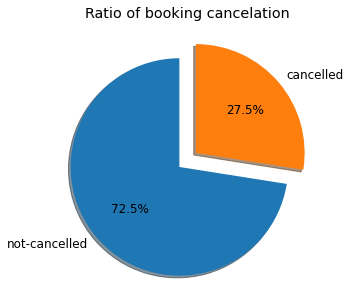

In [25]:
plt.figure(figsize=(5, 5))
plt.pie(df['is_canceled'].value_counts(),
        explode = [0.1,0.1],
        labels = ['not-cancelled', 'cancelled'],
        shadow = True,
        autopct = '%1.1f%%',
        startangle = 90
        )
plt.title('Ratio of booking cancelation')

plt.show()

The above pie chart shows the ratio of canceled bookings to non canceled bookings.

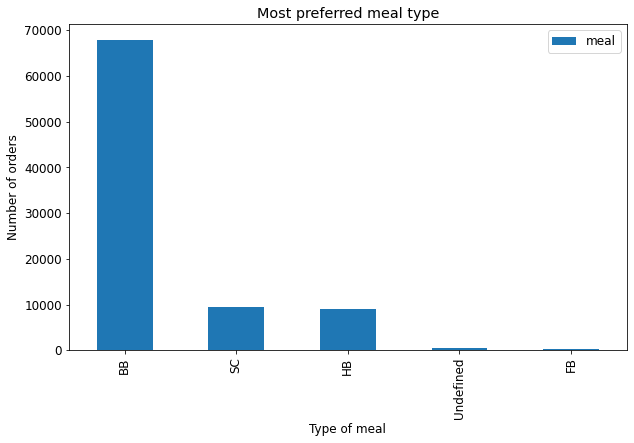

In [26]:
plt.figure(figsize=(10,6))
df['meal'].value_counts().plot(kind = 'bar')
plt.title('Most preferred meal type')
plt.xlabel('Type of meal')
plt.ylabel('Number of orders')
plt.legend()
plt.show()

The most preferred meal type by the guests is BB i.e. bed & breakfast. 

In [27]:
res_room = df.loc[:, ['reserved_room_type']]
assign_room = df.loc[:, ['assigned_room_type']]

In [28]:
got_reserved = [0, 0]
for i in range(len(res_room)):
  if res_room.iloc[i,0] == assign_room.iloc[i, 0]:
    got_reserved[0] += 1
  else: 
    got_reserved[1] += 1
print(got_reserved)

[74283, 13106]


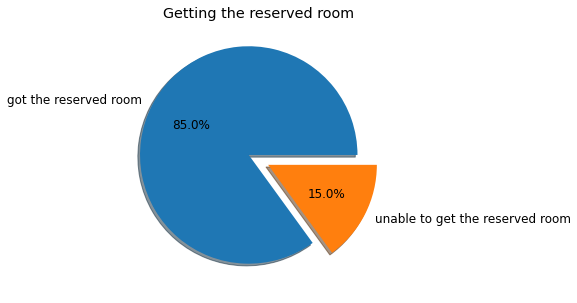

In [29]:
# In the above cell we have compared the reserved and assigned room type and concluded that almost 85% customers have got the room they have reserved for them.
plt.figure(figsize = (10,5))
plt.pie(got_reserved,
        explode = [0.1, 0.1],
        labels = ['got the reserved room', 'unable to get the reserved room'],
        autopct = '%1.1f%%',
        shadow = True)
plt.title('Getting the reserved room')
plt.show()

This shows that 85% of the guests gets the desired room they have reserved for themselves.

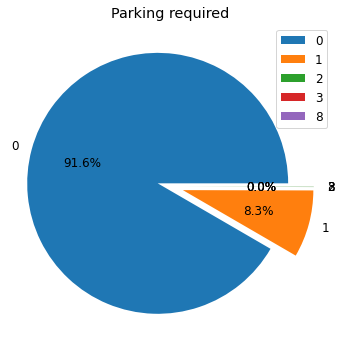

In [30]:
import matplotlib
plt.figure(figsize = (6, 6))
df_parking = df.groupby('required_car_parking_spaces')['required_car_parking_spaces'].count().reset_index(name = 'count')
plt.pie(df_parking['count'],
        labels=df_parking['required_car_parking_spaces'],
        explode = [0.1,0.1,0.1,0.1,0.1],
        autopct = '%1.1f%%'
        )
plt.legend()
plt.title('Parking required')
plt.show()

Almost 91.6% guests do not require a parking space whereas 8.3% guests requires a single parking spot. The rest 0.1% of customers requires more than a single parking spot.

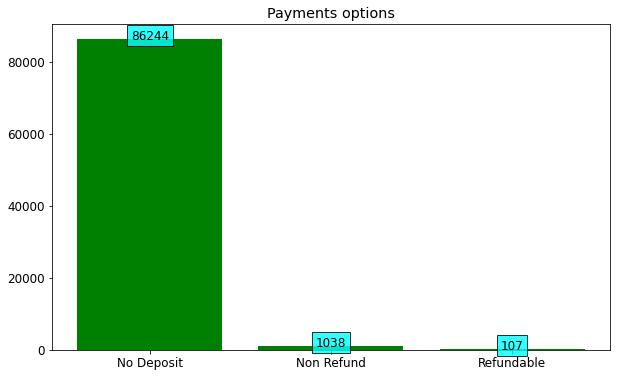

In [142]:
plt.figure(figsize = (10,6))
df_deposit = df.groupby('deposit_type')['deposit_type'].count().reset_index(name = 'count')
plt.bar(x = df_deposit['deposit_type'], height = df_deposit['count'], color = 'green')
plt.title('Payments options')
for i in range(len(df_deposit['deposit_type'])):
  plt.text(i, df_deposit['count'][i], df_deposit['count'][i], ha = 'center', bbox = dict(facecolor = 'cyan', alpha=0.8))
plt.show()

Most of the guests do not prefer to deposit money in advance.

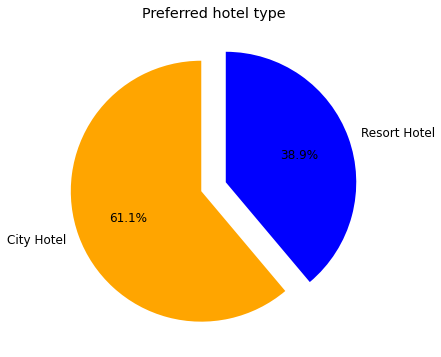

In [32]:
plt.figure(figsize=(10,6))
df_hotel = df.groupby('hotel')['hotel'].count().reset_index(name = 'count')
plt.pie(df_hotel['count'],
        labels=df_hotel['hotel'],
        explode = [0.1,0.1],
        startangle = 90,
        autopct = '%1.1f%%',
        colors = ['orange', 'blue']
        )
plt.title('Preferred hotel type')
plt.show()

The preferences between the two hotel types are quite comparible.

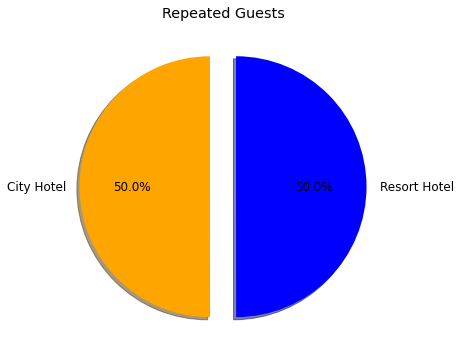

In [139]:
plt.figure(figsize = (10,6))
plt.pie(df.groupby('hotel')['is_repeated_guest'].sum().reset_index(name = 'count')['count'],
        labels = df.groupby('hotel')['is_repeated_guest'].count().reset_index(name = 'count')['hotel'],
        explode = [0.1,0.1],
        shadow = True,
        colors = ['orange', 'blue'],
        startangle = 90,
        autopct = '%1.1f%%')
plt.title('Repeated Guests')
plt.show()

The number of repeated guests for both the hotel types are the same.

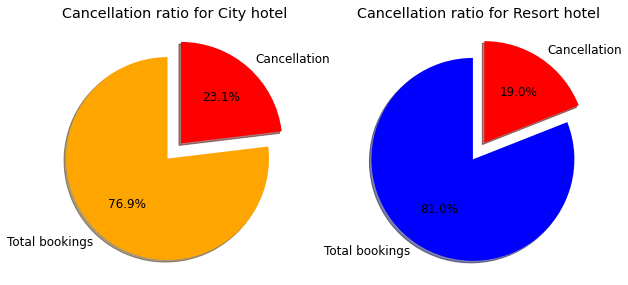

In [171]:
plt.figure(figsize = (10,6))
df_arrival_resort = df.loc[df['hotel'] == 'Resort Hotel', ['is_canceled']]
df_arrival_resort['hotel'] = 'Resort'
df_arrival_city = df.loc[df['hotel'] == 'City Hotel', ['is_canceled']]
df_arrival_city['hotel'] = 'City'
df_arrival = pd.concat([df_arrival_resort, df_arrival_city])
df_arrival = df_arrival.groupby('hotel')['is_canceled'].count().reset_index()
df_arrival['cancel_count'] = df.groupby('hotel')['is_canceled'].sum().reset_index()['is_canceled']
plt.subplot(1,2,1)
plt.title('Cancellation ratio for City hotel')
plt.pie([df_arrival.iloc[0,1], df_arrival.iloc[0,2]], autopct = '%1.1f%%', explode = [0.1,0.1],
        labels = ['Total bookings', 'Cancellation'], shadow = True, startangle = 90, colors=['orange', 'red'])

plt.subplot(1,2,2)
plt.title('Cancellation ratio for Resort hotel')
plt.pie([df_arrival.iloc[1,1], df_arrival.iloc[1,2]], autopct = '%1.1f%%', explode = [0.1,0.1],
        labels = ['Total bookings', 'Cancellation'], shadow = True, startangle = 90, colors=['blue', 'red'])

plt.show()

The rate of cancellation in the City hotels are comparitively greater than that of the rate of cancellation in the Resort hotels.

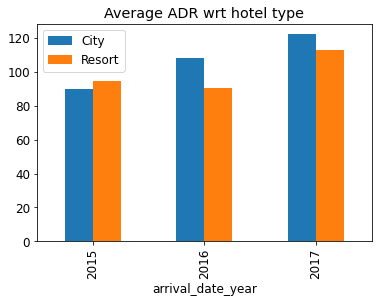

In [35]:
df_arrival_resort = pd.DataFrame(df[df['hotel'] == 'Resort Hotel'].groupby('arrival_date_year')['adr'].mean().reset_index())
df_arrival_resort['hotel'] = 'Resort'
df_arrival_city = pd.DataFrame(df[df['hotel'] == 'City Hotel'].groupby('arrival_date_year')['adr'].mean().reset_index())
df_arrival_city['hotel'] = 'City'
df_arrival = pd.concat([df_arrival_resort, df_arrival_city])
df_pivot = df_arrival.pivot(index = 'arrival_date_year', columns = 'hotel', values = 'adr')
df_pivot.plot(kind = 'bar')
plt.title('Average ADR wrt hotel type')
plt.legend(loc = 'upper left')
plt.show()

After the year 2016, the average of ADR for the City hotels have been higher than that of the Resort hotels.

In [36]:
def month_number(x):
  temp = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
  return temp[x]

In [37]:
df_arrival_month_resort = pd.DataFrame(df[df['hotel'] == 'Resort Hotel'].groupby('arrival_date_month')['hotel']. count().reset_index())
df_arrival_month_city = pd.DataFrame(df[df['hotel'] == 'City Hotel'].groupby('arrival_date_month')['hotel'].count().reset_index())
for i in range(len(df_arrival_month_resort['arrival_date_month'])):
  df_arrival_month_resort.iloc[i,0] = month_number(df_arrival_month_resort.iloc[i,0])
  df_arrival_month_city.iloc[i,0] = month_number(df_arrival_month_city.iloc[i,0])

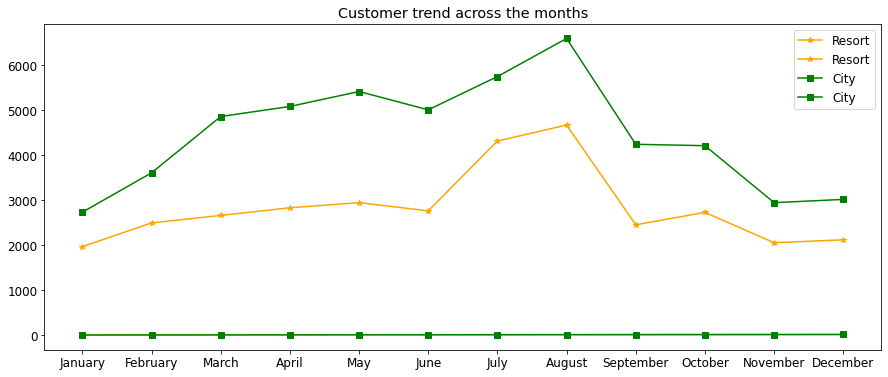

In [173]:
plt.figure(figsize=(15,6))
plt.plot(df_arrival_month_resort.sort_values(by=['arrival_date_month'], ignore_index = True), color='orange', label='Resort', marker = '*')
plt.plot(df_arrival_month_city.sort_values(by=['arrival_date_month'], ignore_index = True), color='green', label='City', marker = 's')
plt.title('Customer trend across the months')
x_ticks = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(range(len(x_ticks)), x_ticks )
plt.legend()
plt.show()

The above trend graph shows that both the hotel types receive most guests in the months of July and August.

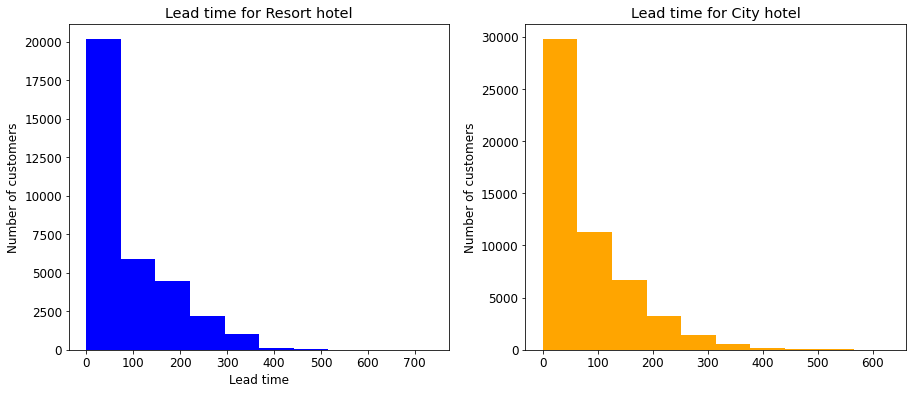

In [174]:
df_lead_time_resort = df.loc[df['hotel'] == 'Resort Hotel', ['lead_time']]
df_lead_time_city = df.loc[df['hotel'] == 'City Hotel', ['lead_time']]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Lead time for Resort hotel')
plt.hist(df_lead_time_resort['lead_time'], color='blue')
plt.xlabel('Lead time')
plt.ylabel('Number of customers')
plt.subplot(1,2,2)
plt.title('Lead time for City hotel')
plt.hist(df_lead_time_city['lead_time'], color='orange')
plt.xlabel('Lead time')
plt.ylabel('Number of customers')
plt.xlabel('')
plt.show()

Both the graphs show that the guests like to pre-plan their stay around 50-60 days.

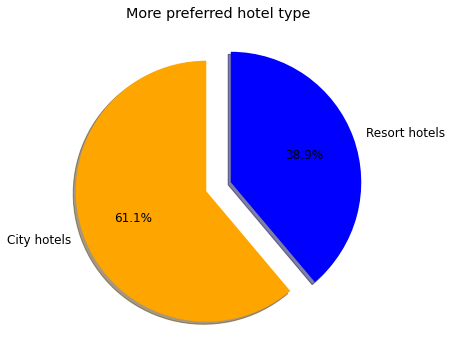

In [175]:
plt.figure(figsize=(10, 6))
plt.pie(df.groupby('hotel')['hotel'].value_counts(),
        autopct = '%1.1f%%',
        explode = [0.1,0.1],
        labels = ['City hotels', 'Resort hotels'],
        shadow = True,
        startangle = 90,
        colors=['orange', 'blue']
        )
plt.title('More preferred hotel type')
plt.show()

Around 61% customers prefer City hotel over the Resort hotel.

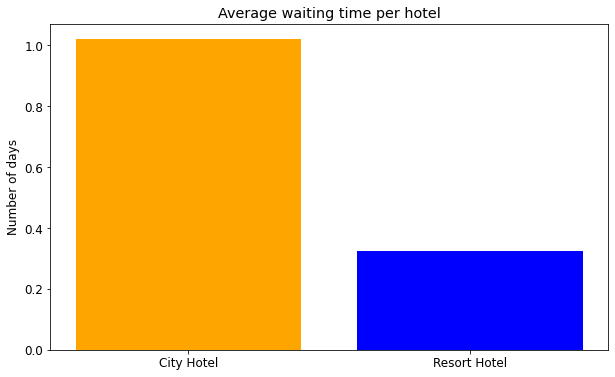

In [41]:
df_waiting_time = pd.DataFrame(df.groupby('hotel')['days_in_waiting_list'].mean().reset_index())
plt.figure(figsize=(10, 6))
plt.bar(x=df_waiting_time['hotel'],
        height = df_waiting_time['days_in_waiting_list'],
        color = ['orange', 'blue'])
plt.title('Average waiting time per hotel')
plt.ylabel('Number of days')
plt.show()

The average waiting time of City hotel are much higher than that of the Resort hotel, this may be due to more bookings by the guests as we have seen that guests prefer City hotel over the Resort hotel.

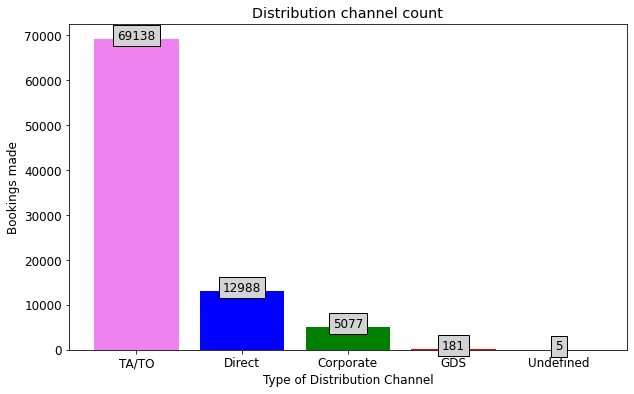

In [43]:
df_dist = df['distribution_channel'].value_counts().reset_index(name='count')
plt.figure(figsize=(10,6))
plt.bar(x='index', height='count', data=df_dist,color=['violet', 'blue', 'green', 'red', 'orange'])
plt.xlabel('Type of Distribution Channel')
plt.ylabel('Bookings made')
for i in range(5):
  plt.text(i, df_dist['count'][i],
           df_dist['count'][i],
           ha = 'center', bbox = dict(facecolor = 'lightgray'))
plt.title('Distribution channel count')
plt.show()

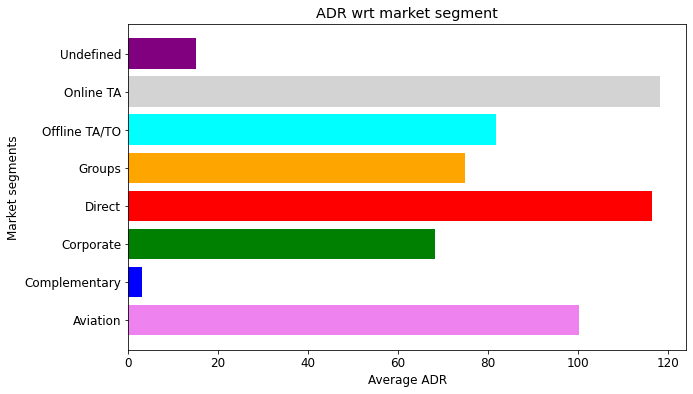

In [44]:
df_market_segment = df.groupby('market_segment')['adr'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.barh(y = 'market_segment', width='adr', data=df_market_segment, color=['violet', 'blue', 'green', 'red', 'orange', 'cyan', 'lightgray', 'purple'])
plt.xlabel('Average ADR')
plt.ylabel('Market segments')
plt.title('ADR wrt market segment')
plt.show()

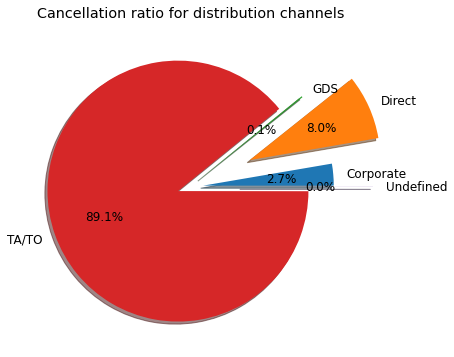

In [45]:
df_dist_cancel = df.groupby('distribution_channel')['is_canceled'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.pie(df_dist_cancel['is_canceled'],
        autopct = '%1.1f%%', 
        explode = [0.1,0.5,0.1,0.1,0.4],
        shadow = True,
        labels = list(df_dist_cancel['distribution_channel']))
plt.title('Cancellation ratio for distribution channels')
plt.show()

<Figure size 1080x720 with 0 Axes>

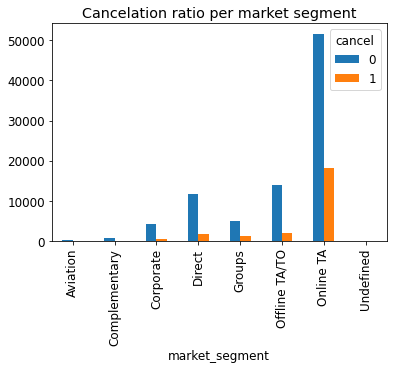

In [46]:
df_market = df.groupby('market_segment')['is_canceled'].sum().reset_index()
df_market['cancel'] = 1
df_market_total = df.groupby('market_segment')['is_canceled'].count().reset_index()
df_market_total['cancel'] = 0
df_mark = pd.concat([df_market, df_market_total])
plt.figure(figsize=(15,10))
df_pivot = df_mark.pivot(index = 'market_segment', columns = 'cancel', values = 'is_canceled')
df_pivot.plot(kind = 'bar')
plt.title('Cancelation ratio per market segment')
plt.show()

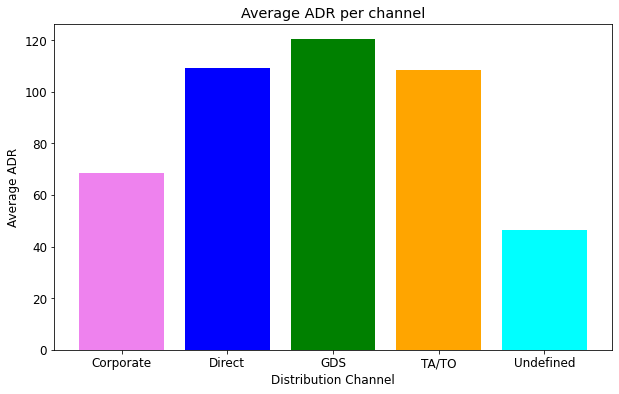

In [47]:
df_dist_adr = df.groupby('distribution_channel')['adr'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(x = 'distribution_channel', height='adr', color=['violet', 'blue', 'green', 'orange', 'cyan'], data = df_dist_adr)
plt.title('Average ADR per channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Average ADR')
plt.show()

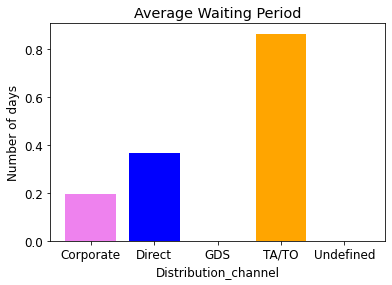

In [48]:
df_dist_wait = df.groupby('distribution_channel')['days_in_waiting_list'].mean().reset_index()
plt.bar(x='distribution_channel', height='days_in_waiting_list', color=['violet', 'blue', 'green', 'orange', 'cyan'], data = df_dist_wait)
plt.xlabel('Distribution_channel')
plt.ylabel('Number of days')
plt.title('Average Waiting Period')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

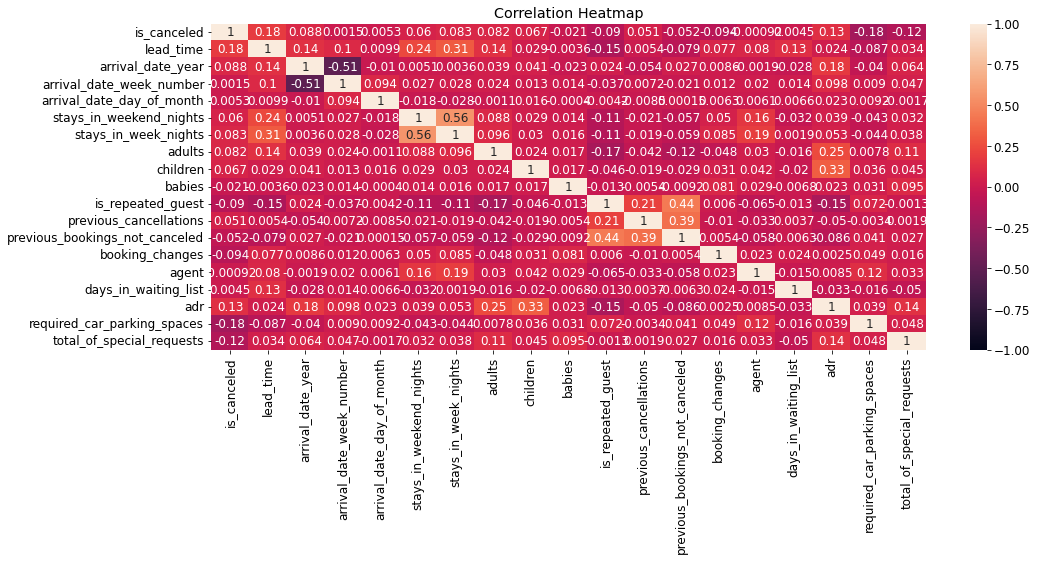

In [49]:
# Finally making a correlation heatmap which will tell us about the dependency of each column with the other columns.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap')

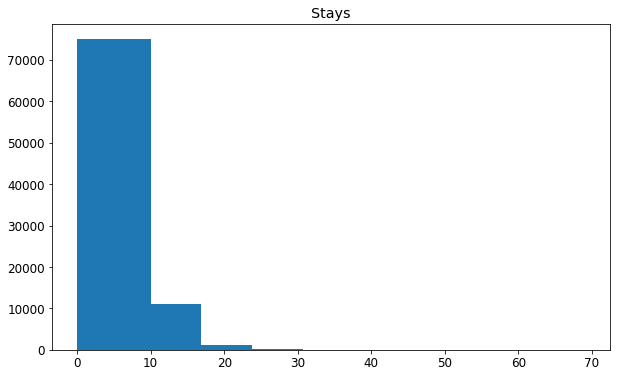

In [71]:
df_stay_length = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
plt.figure(figsize=(10, 6))
plt.hist(df_stay_length, width=10)
plt.title('Stays')
plt.show()

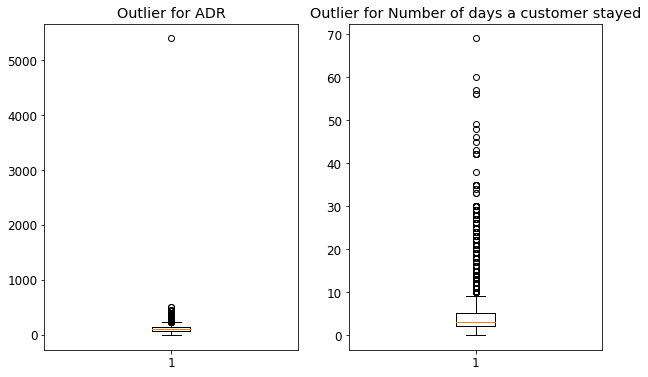

In [92]:
df_stay_adr = pd.DataFrame(df['adr'])
df_stay_adr['days'] = df_stay_length

plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
plt.title('Outlier for ADR')
plt.boxplot(df_stay_adr['adr'], meanline = True)
plt.subplot(1,2,2)
plt.title('Outlier for Number of days a customer stayed')
plt.boxplot(df_stay_adr['days'], meanline=True)
plt.show()

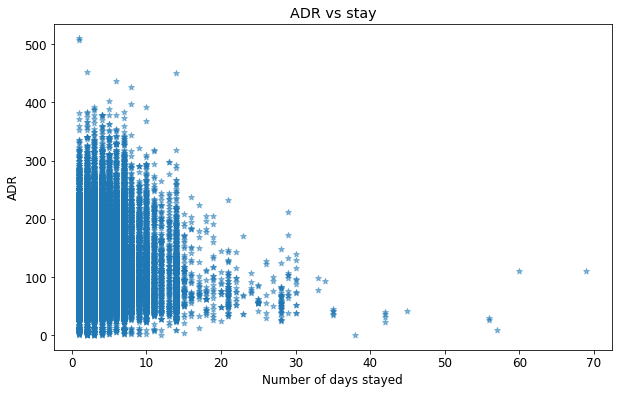

In [117]:
# Removing the outlier or the rows where the ADR value is 0.
df_stay_adr.drop(df_stay_adr[(df_stay_adr['adr'] > 5000) | (df_stay_adr['adr'] <= 0)].index, inplace = True, axis = 0)

# Plotting a scatter plot that shows the relation between the ADR and the days the customer had stayed
plt.figure(figsize=(10, 6))
plt.scatter(x=df_stay_adr[['days']], y=df_stay_adr['adr'], marker = '*', alpha=0.5)
plt.title('ADR vs stay')
plt.xlabel('Number of days stayed')
plt.ylabel('ADR')
plt.show()

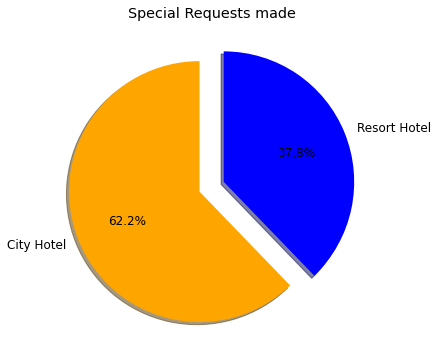

In [122]:
df_special_req = df.groupby('hotel')['total_of_special_requests'].sum().reset_index()
plt.figure(figsize = (6,6))
plt.pie(df_special_req['total_of_special_requests'],
        shadow = True,
        startangle = 90,
        autopct = '%1.1f%%',
        colors = ['orange', 'blue'],
        labels = df_special_req['hotel'],
        explode = [0.1,0.1]
        )
plt.title('Special Requests made')
plt.show()

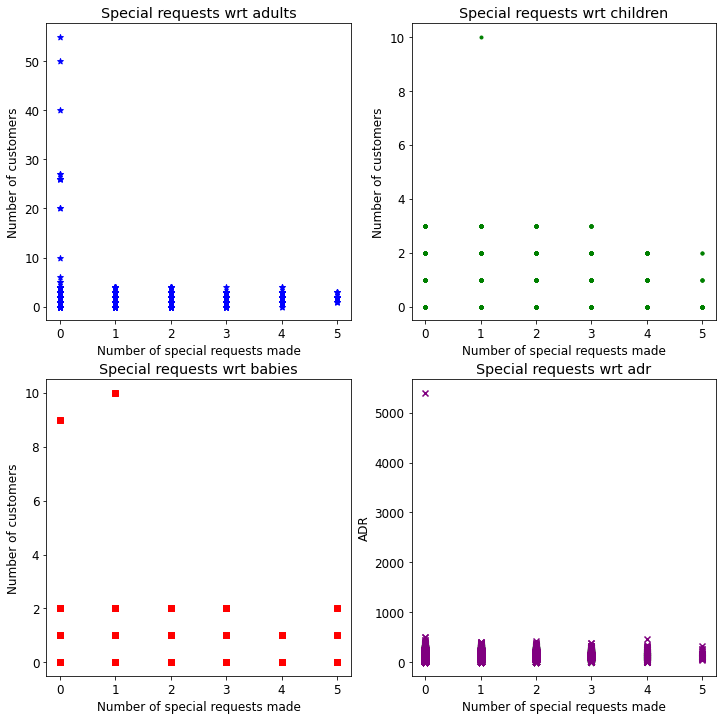

In [135]:
# Let us try to figure out the reason for special requests
plt.figure(figsize = (12, 12))
plt.subplot(2,2,1)
plt.scatter(x=df['total_of_special_requests'], y=df['adults'], color = 'blue', marker = '*')
plt.title('Special requests wrt adults')
plt.ylabel('Number of customers')
plt.xlabel('Number of special requests made')

plt.subplot(2,2,2)
plt.scatter(x=df['total_of_special_requests'], y=df['children'], color = 'green', marker = '.')
plt.title('Special requests wrt children')
plt.ylabel('Number of customers')
plt.xlabel('Number of special requests made')

plt.subplot(2,2,3)
plt.scatter(x=df['total_of_special_requests'], y=df['babies'], color = 'red', marker = 's')
plt.title('Special requests wrt babies')
plt.ylabel('Number of customers')
plt.xlabel('Number of special requests made')

plt.subplot(2,2,4)
plt.scatter(x=df['total_of_special_requests'], y=df['adr'], color = 'purple', marker = 'x')
plt.title('Special requests wrt adr')
plt.ylabel('ADR')
plt.xlabel('Number of special requests made')

plt.show()

In [138]:
df.loc[:,['reservation_status', 'reservation_status_date']]

,reservation_status,reservation_status_date
0,Check-Out,2015-07-01
1,Check-Out,2015-07-01
2,Check-Out,2015-07-02
3,Check-Out,2015-07-02
4,Check-Out,2015-07-03
...,...,...
87384,Check-Out,2017-09-06
87385,Check-Out,2017-09-07
87386,Check-Out,2017-09-07
87387,Check-Out,2017-09-07
